In [53]:
#Daniel Bon Durant
#Date: 12/4/2023
#Advanced Python Programming (CIS-2532-NET02)

#This program demonstrates code written by Joseph Lee Wei En
#This program is not original, simply a duplicate program to learn how the code and learn Neural Networks work.
#Original Author: Joseph Lee Wei En
#Duplicate Author: Daniel Bon Durant
#link to Joseph Lee Wei En's article, Build your first Convolutional Neural Network to recognize images:
#https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce


#Description: This is a duplicate of Joseph Lee Wei En's original work.
#             This program is intended to predict the subject of an image using deeplearning. 
#             The subjects of the image are intended to be cats, dogs, horses, etc.
#             The program intends to train a model after preprocessing some image data to fit the models learning requirements.
#             Once the model has been trained, I will provide it with an image obtained from Joseph Lee Wei En
#             This will test the model and see if it can correctly identify a cat.


In [54]:
#download the dataset, set the image data to arrays of training and testing data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [55]:
#determine the shape of the input feature array
print('x_train shape:', x_train.shape)

#shape is 5000 images, 32 pixels in height, 32 pixels in width, and 3 pixels in depth

x_train shape: (50000, 32, 32, 3)


In [56]:
#determine shape of the label array
print('y_train shape:', y_train.shape)

#one number for each 50000 images.

y_train shape: (50000, 1)


In [57]:
#example of an image
print(x_train[0])
#this format is unfriendly to a human observer, it is how the cpu would 'see' the images

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


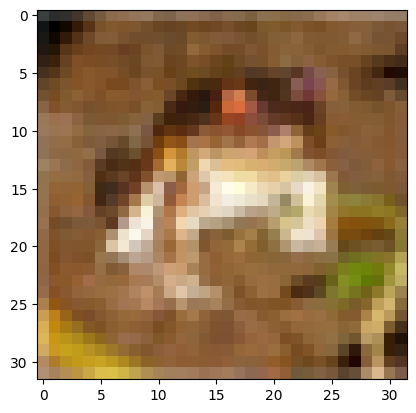

In [58]:
#to do this, we need to import packages
import matplotlib.pyplot as plt
%matplotlib inline
#tells notebook the image should display within the image

#imshow displays the numbered pixels from the actual image
img = plt.imshow(x_train[0])

In [59]:
#determine the corresponding label with the above image
print('The label is:', y_train[0])

The label is: [6]


In [60]:
print('0:airplane\n1:automobile\n2:bird\n3:cat\n4:deer\n5:dog\n6:frog\n7:horse\n8:ship\n9:truck')

0:airplane
1:automobile
2:bird
3:cat
4:deer
5:dog
6:frog
7:horse
8:ship
9:truck


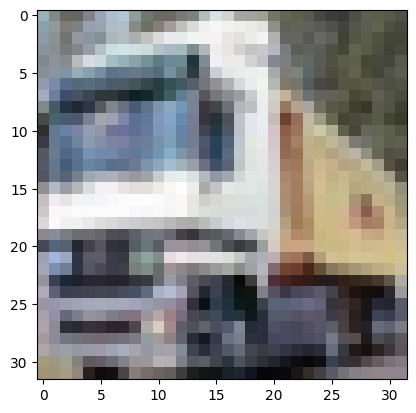

In [61]:
#show the second image in the dataset
img = plt.imshow(x_train[1])

In [62]:
#display the label
print('The label is:', y_train[1])

The label is: [9]


In [63]:
#begin processing labels
import keras

#these are converting the initial array into one hot encodings. 10 is the number of neurons
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [64]:
#begin processing images
#set the data type as float 32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#divide by 255 to get all pixel values to be between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [65]:
#examine the array values of the first training image
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [66]:
#before creating layers, need to import package
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [67]:
#call an empty sequential model
model = Sequential()

#add to it one layer at a time. model.add() is called to do so
#32 refers to depth, 3,3 refers to filter width and size, respectively. relu is the activation and padding is the same
#stride defaults to 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

#add the second layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

#add the third layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#add the fourth
model.add(Dropout(0.25))

#rest of the layers 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#flatten the neurons
model.add(Flatten())

model.add(Dense(512, activation='relu'))

#add another dropout probability
model.add(Dropout(0.5))

#dense FC layer with 10 nerons, softmax activation
model.add(Dense(10, activation='softmax'))

In [68]:
#get summary of model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [69]:
#compile the model 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#run the training
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)
#validation split of .2 specifies that 20% of the data is the validation set. This reduces total # lines and is efficient

Epoch 1/20
1250/1250 [==============================] - 68s 53ms/step - loss: 1.5492 - accuracy: 0.4369 - val_loss: 1.2170 - val_accuracy: 0.5657
Epoch 2/20
1250/1250 [==============================] - 62s 50ms/step - loss: 1.1369 - accuracy: 0.5937 - val_loss: 0.9551 - val_accuracy: 0.6646
Epoch 3/20
1250/1250 [==============================] - 62s 50ms/step - loss: 0.9770 - accuracy: 0.6557 - val_loss: 0.8283 - val_accuracy: 0.7090
Epoch 4/20
1250/1250 [==============================] - 62s 50ms/step - loss: 0.8748 - accuracy: 0.6923 - val_loss: 0.7903 - val_accuracy: 0.7253
Epoch 5/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.8043 - accuracy: 0.7155 - val_loss: 0.7522 - val_accuracy: 0.7380
Epoch 6/20
1250/1250 [==============================] - 61s 49ms/step - loss: 0.7404 - accuracy: 0.7380 - val_loss: 0.7218 - val_accuracy: 0.7496
Epoch 7/20
1250/1250 [==============================] - 63s 50ms/step - loss: 0.6938 - accuracy: 0.7557 - val_loss: 0.7094 -

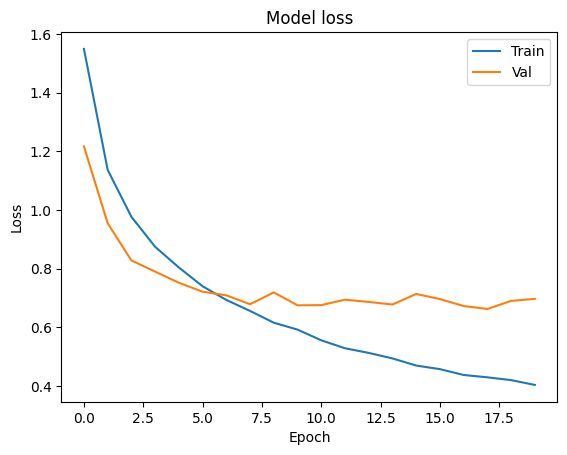

In [70]:
#need matplotlib
import matplotlib.pyplot as plt



#graphing code very similar to the first problems graphing
#plot the loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

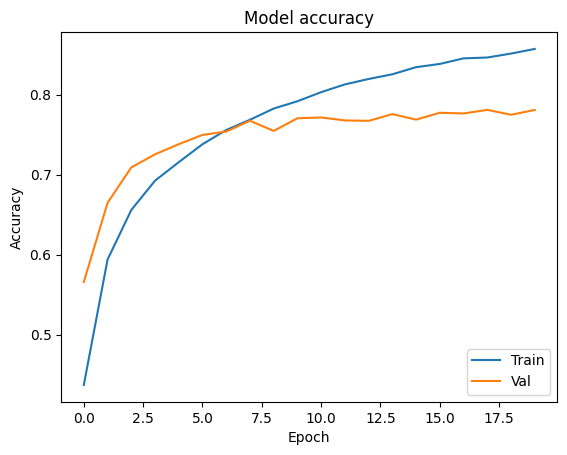

In [71]:
#visualize the accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [72]:
#evaluate the models accuracy, as a %
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 12ms/step - loss: 0.7310 - accuracy: 0.7748


0.7748000025749207

In [73]:
#save the model so it doesn't need to be retrained
model.save('my_cifar10_model.h5')

#to use this model in other code, use this line
#from keras.models import load_model
#model = load_model('my_cifar10_model.h5')



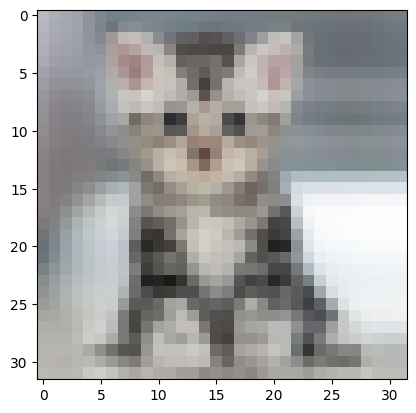

In [74]:
#testing the model using images of our "own" cats. The image was given by the author of this program, Joseph Lee Wei En
#read the image as an array of pixel values
my_image = plt.imread("cat.jpg")

#need to resize the image into a 32 32 3 format. 32 pixels, 32 pixels, 
#for this scikit-image must be installed, doing that externally

from skimage.transform import resize

#resize the image
my_image_resized = resize(my_image, (32,32,3))

#visualize the resized image
img = plt.imshow(my_image_resized)

In [75]:
#feed the training model the image of the cat
import numpy as np

#numpy.array is used to alter the 3d array we have for the cat image into a 4d array, so the probabilities can use a 4-d input
probabilities = model.predict(np.array( [my_image_resized,] ))

1/1 [==============================] - 0s 121ms/step


In [76]:
#run the probabilities to see the entire array
probabilities

array([[2.4957483e-04, 1.0099733e-05, 4.5509352e-03, 4.0942255e-01,
        6.0798302e-02, 2.6879981e-01, 1.3408976e-03, 2.5412929e-01,
        2.8151033e-05, 6.7030755e-04]], dtype=float32)

In [77]:
#The following code snippet just formats the propobabliity outputs to make the probabilities more user friendly
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.40942255
Second most likely class: dog -- Probability: 0.2687998
Third most likely class: horse -- Probability: 0.2541293
Fourth most likely class: deer -- Probability: 0.060798302
Fifth most likely class: bird -- Probability: 0.0045509352


The model thinks this is mostly a dog, or a deer, with a cat in third. It is obviously wrong.
